In [243]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import os
os.getcwd()

'G:\\05_Course\\001_Project_Data_analytics\\Mashroom_classifier'

In [6]:
mushroom_df = pd.read_csv('mushrooms.csv')

In [7]:
mushroom_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


https://www.kaggle.com/uciml/mushroom-classification												
												
About this file

Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [20]:
# mushroom_df.isnull().any(axis = 1)
# mushroom_df.isnull().any(axis = 0)
sum(mushroom_df.isnull().any())

0

In [27]:
sum(mushroom_df.duplicated())

0

In [69]:
# mushroom_df['class'].value_counts()
mushroom_df['class'].nunique()
mushroom_df['class'].unique()
for column in mushroom_df.columns:
    print(column + ':' , mushroom_df[column].unique())

class: ['p' 'e']
cap-shape: ['x' 'b' 's' 'f' 'k' 'c']
cap-surface: ['s' 'y' 'f' 'g']
cap-color: ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises: ['t' 'f']
odor: ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment: ['f' 'a']
gill-spacing: ['c' 'w']
gill-size: ['n' 'b']
gill-color: ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape: ['e' 't']
stalk-root: ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring: ['s' 'f' 'k' 'y']
stalk-surface-below-ring: ['s' 'f' 'y' 'k']
stalk-color-above-ring: ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring: ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type: ['p']
veil-color: ['w' 'n' 'o' 'y']
ring-number: ['o' 't' 'n']
ring-type: ['p' 'e' 'l' 'f' 'n']
spore-print-color: ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population: ['s' 'n' 'a' 'v' 'y' 'c']
habitat: ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [73]:
for column in mushroom_df.columns: 
    que_mark = sum(mushroom_df[column].str.contains('?', regex=False))
    if que_mark != 0: print(column + ':', que_mark)

stalk-root: 2480


In [74]:
mushroom_df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [105]:
# type(mushroom_df.describe())
mushroom_df.describe().loc[:,'ring-type']
# mushroom_df.describe()

count     8124
unique       5
top          p
freq      3968
Name: ring-type, dtype: object

In [111]:
# pd.crosstab(index=mushroom_df['class'],columns='count', normalize=True)
pd.crosstab(mushroom_df['class'],'count', normalize=True)

col_0,count
class,
e,0.517971
p,0.482029


In [160]:
pd.crosstab(mushroom_df['class'],mushroom_df['odor'], normalize=True, margins=True)

odor,a,c,f,l,m,n,p,s,y,All
class,,,,,,,,,,
e,0.049237,0.000000,0.000000,0.049237,0.000000,0.419498,0.000000,0.000000,0.000000,0.517971
p,0.000000,0.023634,0.265879,0.000000,0.004431,0.014771,0.031512,0.070901,0.070901,0.482029
All,0.049237,0.023634,0.265879,0.049237,0.004431,0.434269,0.031512,0.070901,0.070901,1.000000


In [113]:
for column in mushroom_df.columns:
    print(pd.crosstab(mushroom_df[column],'count', normalize=True))

col_0     count
class          
e      0.517971
p      0.482029
col_0         count
cap-shape          
b          0.055638
c          0.000492
f          0.387986
k          0.101920
s          0.003939
x          0.450025
col_0           count
cap-surface          
f            0.285574
g            0.000492
s            0.314623
y            0.399311
col_0         count
cap-color          
b          0.020679
c          0.005416
e          0.184638
g          0.226489
n          0.281142
p          0.017725
r          0.001969
u          0.001969
w          0.128016
y          0.131955
col_0       count
bruises          
f        0.584441
t        0.415559
col_0     count
odor           
a      0.049237
c      0.023634
f      0.265879
l      0.049237
m      0.004431
n      0.434269
p      0.031512
s      0.070901
y      0.070901
col_0               count
gill-attachment          
a                0.025849
f                0.974151
col_0            count
gill-spacing          
c     

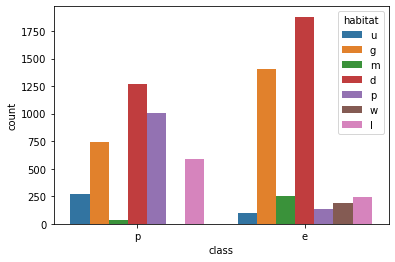

In [122]:

sns.countplot(x = mushroom_df['class'], hue = mushroom_df['habitat'], dodge = True) #dodge makes hue nested along the horizontal

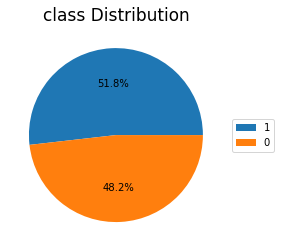

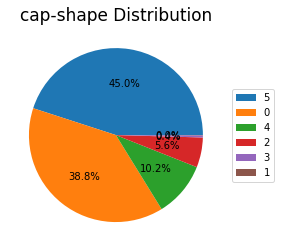

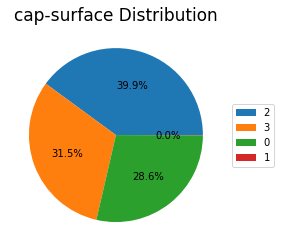

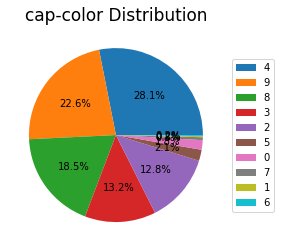

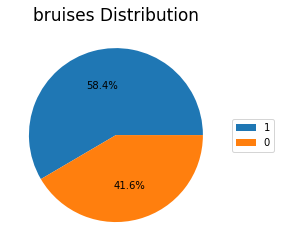

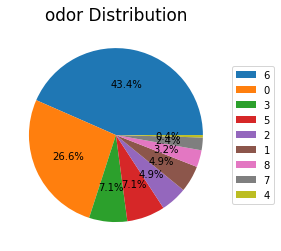

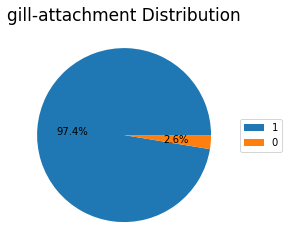

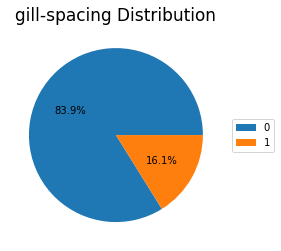

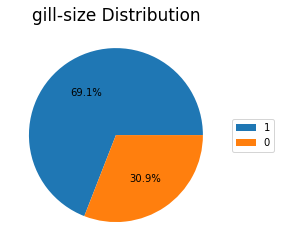

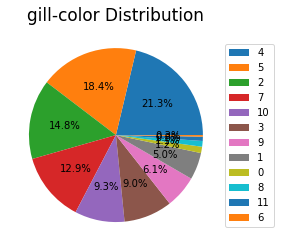

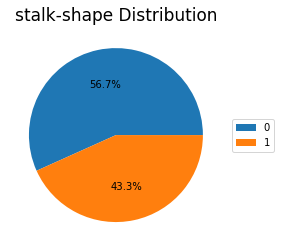

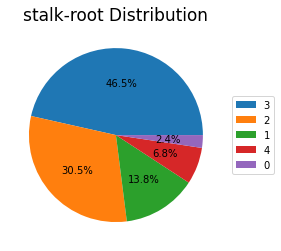

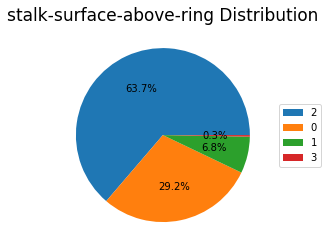

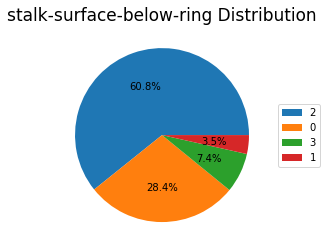

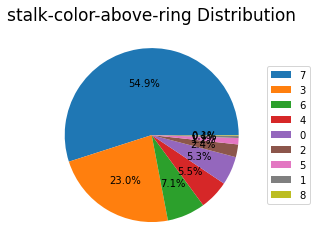

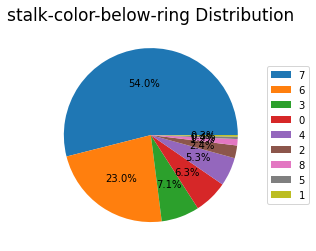

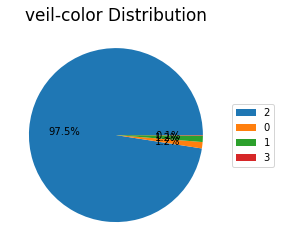

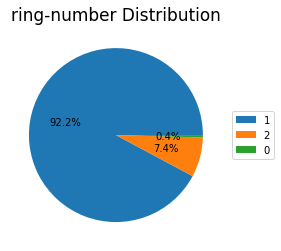

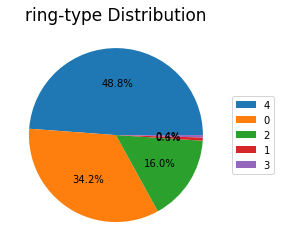

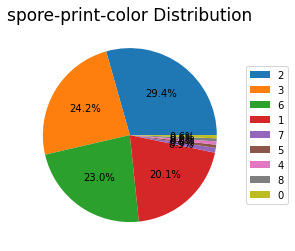

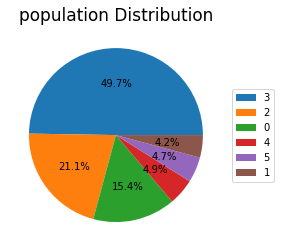

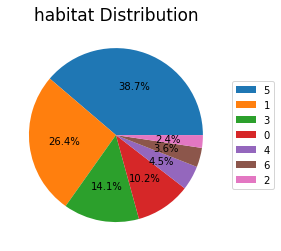

In [242]:

for column in mushroom_df.columns:
    plt.pie(x = mushroom_df[column].value_counts(), autopct='%1.1f%%')
    plt.legend(labels=mushroom_df[column].unique(),loc='right',bbox_to_anchor=(1, 0.25, 0.25, 0.5))
    plt.title(f"{column} Distribution", fontsize=17)
    plt.show()
# plt.pie(x = mushroom_df['class'].value_counts(), labels=mushroom_df['class'].unique(),autopct='%1.1f%%' )

By looking at the pie charts, the veil-type is of only one type (constant variable), hence we can drop from dataset

In [161]:
mushroom_df.drop('veil-type', axis=1,inplace=True)

In [163]:
mushroom_df.shape

(8124, 22)

Now, let's encode the data:

In [165]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for column in mushroom_df.columns:
    mushroom_df[column] = le.fit_transform(mushroom_df[column])

In [166]:
mushroom_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [168]:
x = mushroom_df.drop('class',axis =1)
y = mushroom_df['class']

In [169]:
print(x.shape,y.shape)

(8124, 21) (8124,)


In [190]:
y.ravel()

array([1, 0, 0, ..., 0, 1, 0])

In [175]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 47)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(6499, 21) (1625, 21) (6499,) (1625,)


In [209]:
dict_acc = {}
type(dict_acc)
dict_acc

{}

In [210]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=50)
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix
dict_acc['logistic_regression'] = accuracy_score(y_test,lr_pred)
print(dict_acc)
confusion_matrix(y_test,lr_pred)

{'logistic_regression': 0.944}


C:\Users\a\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[781,  42],
       [ 49, 753]], dtype=int64)

In [211]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=10)

gbc.fit(x_train,y_train)
gbc_pred = gbc.predict(x_test)

dict_acc['gradient_boost'] = accuracy_score(y_test,gbc_pred)
print(dict_acc)
confusion_matrix(y_test,gbc_pred)

{'logistic_regression': 0.944, 'gradient_boost': 0.9790769230769231}


array([[820,   3],
       [ 31, 771]], dtype=int64)

In [237]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10)

rfc.fit(x_train,y_train)
rfc_pred = rfc.predict(x_test)

dict_acc['random_forest'] = accuracy_score(y_test,rfc_pred)
print(dict_acc)
confusion_matrix(y_test,rfc_pred)

{'logistic_regression': 0.944, 'gradient_boost': 0.9790769230769231, 'radom_forest': 1.0, 'naive_bayes': 0.9261538461538461, 'xgboost': 1.0, 'random_forest': 1.0}


array([[823,   0],
       [  0, 802]], dtype=int64)

In [216]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(x_train,y_train)

gaussian_pred = gaussian.predict(x_test)

dict_acc['naive_bayes'] = accuracy_score(y_test,gaussian_pred)
print(f'{dict_acc}')
confusion_matrix(y_test,gaussian_pred)

{'logistic_regression': 0.944, 'gradient_boost': 0.9790769230769231, 'radom_forest': 1.0, 'naive_bayes': 0.9261538461538461}


array([[762,  61],
       [ 59, 743]], dtype=int64)

In [236]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

xgb_pred = xgb.predict(x_test)

dict_acc['xgboost'] = accuracy_score(y_test,xgb_pred)
print(f'{dict_acc}')
confusion_matrix(y_test,xgb_pred)

{'logistic_regression': 0.944, 'gradient_boost': 0.9790769230769231, 'radom_forest': 1.0, 'naive_bayes': 0.9261538461538461, 'xgboost': 1.0}


array([[823,   0],
       [  0, 802]], dtype=int64)

In [238]:
x_axis = list(dict_acc.keys())
y_axis = list(dict_acc.values())
print(x_axis,y_axis)

['logistic_regression', 'gradient_boost', 'radom_forest', 'naive_bayes', 'xgboost', 'random_forest'] [0.944, 0.9790769230769231, 1.0, 0.9261538461538461, 1.0, 1.0]


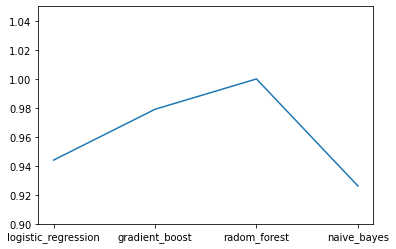

In [234]:
plt.plot(x_axis,y_axis)
plt.ylim(0.9,1.05)
plt.show()

From our models, we got random forest classifier giving the best fit, however by changing the input parameters we get different results.